# CMP4336 - Introduction to Data Mining HW2 Naive Bayes Classification

# Classification of Abalone Age from Body Measurements

# Furkan Kilicaslan

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
index_col = ["Sex","Length","Diam","Height","Whole",
             "Shucked","Viscera","Shell","Rings"]
abalone = pd.read_csv("abalone.txt",names=index_col)
# Convert rings column to age column with classes
# 1 2 3 for young middle and old respectively
age = pd.DataFrame(abalone["Rings"].apply(
    lambda x : 1 if x < 8 else (2 if x < 12 else 3)))
# Covnert Sex column to numerics M F I to 1 2 3 respectively
abalone["Sex"] = abalone["Sex"].apply(
    lambda x : 1 if x == "M" else (2 if x == "F" else 3))
age.columns = ["Age"]
# Drop the rings column
abalone.drop(["Rings"],axis=1,inplace=True)
abalone.head(3)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21


In [98]:
age.head(3)

,Age
0,3
1,1
2,2


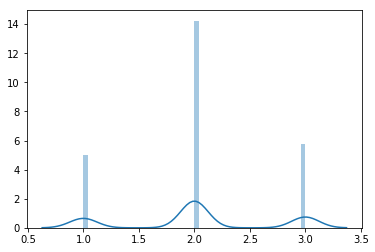

In [99]:
sns.distplot(age)
# Here we can see that the amount of old and young
# labeled samples are lower in numbers.
# This may cause underfitting and the models for
# classification may have low accuracy.

In [100]:
abalone.head(3)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21


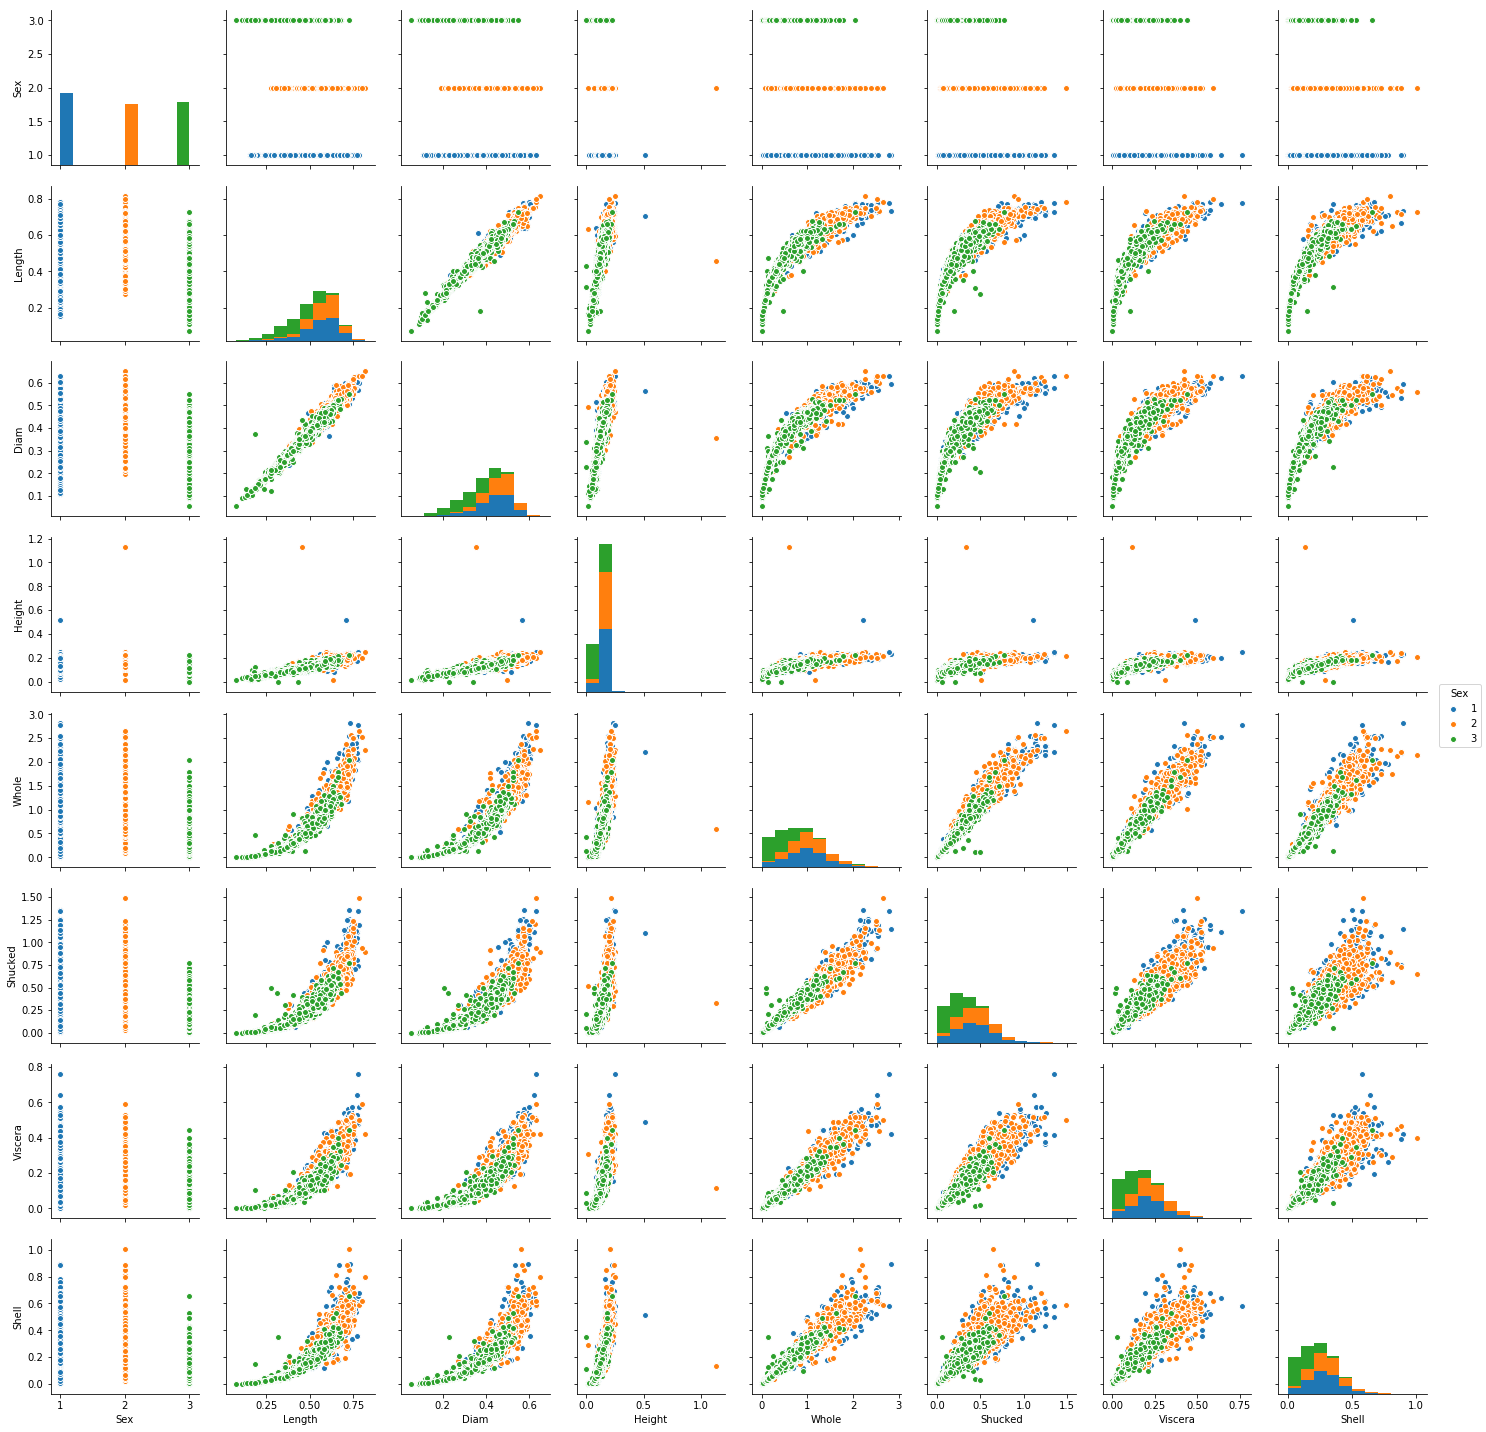

In [101]:
sns.pairplot(abalone,hue="Sex")
# Here we can see that there are some outliers in the data
# Though the plots are mostly indicative of correlation with other features.

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Use all of the data is input
X = abalone.values
y = age.values.ravel()

# Build Gaussian Naive Bayes Model
gnb = GaussianNB()

# Build KFold Cross Validation Generator 
# with 40 folds(Approximately 100 samples for training 
# and the rest for validation)
kf = KFold(n_splits=40)

# Calculate cross validation scores
scores = cross_val_score(gnb, X, y, cv=kf)  

# Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(gnb,X,y,cv=kf)

# Build confusion matrix from predictions and the actual labels
conf_mat = confusion_matrix(y,y_pred)

# Print the confusion matrix, cross validation scores and the classification report
print("Confusion Matrix : \n",conf_mat,"\nCross Validation Scores : \n",
      scores,"\nClassification Report : \n",classification_report(y,y_pred))                                

Confusion Matrix : 
 [[ 738   96    5]
 [ 475 1135  768]
 [  68  429  463]] 
Cross Validation Scores : 
 [0.62857143 0.60952381 0.62857143 0.62857143 0.54285714 0.26666667
 0.4        0.55238095 0.7047619  0.39047619 0.82857143 0.54285714
 0.7047619  0.47619048 0.54285714 0.73333333 0.41904762 0.63461538
 0.56730769 0.67307692 0.60576923 0.65384615 0.375      0.40384615
 0.53846154 0.61538462 0.66346154 0.64423077 0.47115385 0.61538462
 0.56730769 0.41346154 0.5        0.52884615 0.53846154 0.50961538
 0.625      0.46153846 0.54807692 0.61538462] 
Classification Report : 
              precision    recall  f1-score   support

          1       0.58      0.88      0.70       839
          2       0.68      0.48      0.56      2378
          3       0.37      0.48      0.42       960

avg / total       0.59      0.56      0.56      4177



In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Use all of the data is input
X = abalone.values
y = age.values.ravel()

# Build Gaussian Naive Bayes Model
gnb = GaussianNB()

# Build KFold Cross Validation Generator with 
# 4 folds(Approximately 1000 samples for training 
# and the rest for validation)
kf = KFold(n_splits=4)

# Calculate cross validation scores
scores = cross_val_score(gnb, X, y, cv=kf)  

# Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(gnb,X,y,cv=kf)

# Build confusion matrix from predictions and the actual labels
conf_mat = confusion_matrix(y,y_pred)

# Print the confusion matrix, cross validation scores and the classification report
print("Confusion Matrix : \n",conf_mat,"\nCross Validation Scores : \n",
      scores,"\nClassification Report : \n",classification_report(y,y_pred))  

Confusion Matrix : 
 [[ 736   97    6]
 [ 476 1108  794]
 [  69  457  434]] 
Cross Validation Scores : 
 [0.52344498 0.55747126 0.56130268 0.53927203] 
Classification Report : 
              precision    recall  f1-score   support

          1       0.57      0.88      0.69       839
          2       0.67      0.47      0.55      2378
          3       0.35      0.45      0.40       960

avg / total       0.58      0.55      0.54      4177



In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Use only sex, length and diameter as input data
X = abalone[["Sex","Length","Diam"]].values
y = age.values.ravel()

# Build Gaussian Naive Bayes Model
gnb = GaussianNB()

# Build KFold Cross Validation Generator with
# 40 folds(Approximately 100 samples for training 
# and the rest for validation)
kf = KFold(n_splits=40)

# Calculate cross validation scores
scores = cross_val_score(gnb, X, y, cv=kf)  

# Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(gnb,X,y,cv=kf)

# Build confusion matrix from predictions and the actual labels
conf_mat = confusion_matrix(y,y_pred)

# Print the confusion matrix, cross validation scores and the classification report
print("Confusion Matrix : \n",conf_mat,"\nCross Validation Scores : \n",
      scores,"\nClassification Report : \n",classification_report(y,y_pred))

Confusion Matrix : 
 [[ 669  168    2]
 [ 275 1657  446]
 [  35  673  252]] 
Cross Validation Scores : 
 [0.6        0.62857143 0.52380952 0.52380952 0.44761905 0.32380952
 0.43809524 0.57142857 0.75238095 0.61904762 0.83809524 0.64761905
 0.85714286 0.6        0.68571429 0.86666667 0.47619048 0.73076923
 0.69230769 0.75       0.61538462 0.49038462 0.33653846 0.43269231
 0.77884615 0.625      0.69230769 0.81730769 0.64423077 0.74038462
 0.50961538 0.34615385 0.52884615 0.63461538 0.74038462 0.69230769
 0.72115385 0.45192308 0.57692308 0.74038462] 
Classification Report : 
              precision    recall  f1-score   support

          1       0.68      0.80      0.74       839
          2       0.66      0.70      0.68      2378
          3       0.36      0.26      0.30       960

avg / total       0.60      0.62      0.60      4177



In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Use only sex, length and diameter as input data
X = abalone[["Sex","Length","Diam"]].values
y = age.values.ravel()

# Build Gaussian Naive Bayes Model
gnb = GaussianNB()

# Build KFold Cross Validation Generator with 
# 4 folds(Approximately 1000 samples for training 
# and the rest for validation)
kf = KFold(n_splits=4)

# Calculate cross validation scores
scores = cross_val_score(gnb, X, y, cv=kf)  

# Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(gnb,X,y,cv=kf)

# Build confusion matrix from predictions and the actual labels
conf_mat = confusion_matrix(y,y_pred)

# Print the confusion matrix, cross validation scores and the classification report
print("Confusion Matrix : \n",conf_mat,"\nCross Validation Scores : \n",
      scores,"\nClassification Report : \n",classification_report(y,y_pred))

Confusion Matrix : 
 [[ 671  164    4]
 [ 274 1513  591]
 [  37  693  230]] 
Cross Validation Scores : 
 [0.52631579 0.55172414 0.6302682  0.60344828] 
Classification Report : 
              precision    recall  f1-score   support

          1       0.68      0.80      0.74       839
          2       0.64      0.64      0.64      2378
          3       0.28      0.24      0.26       960

avg / total       0.56      0.58      0.57      4177



# Conclusion

* As we can see from the confusion matrices, our model is having the most trouble with differentiating between class 2 and 3 which results in very low accuracy for class 3 as it already has low amount of samples.

* The model that uses Sex, Length and Diameter as input and 40 folds for cross validation provides the highest accuracy levels.This indicates that these 3 parameters are more related to the age of the abalone than all of the inputs combined.Also it was expected to get better results with 40 folds than 4 folds as the model is able to generalize better without overfitting.

* The numbers on the main diagonal of the confusion matrix show the amount of correctly predicted classes while the rest show the amount of incorrect predictions.